# **Titanic - Machine Learning Kaggle Competition**

Implemente uma Rede Neural Artificial que faça a predição se um passageiro sobreviveu ou não ao acidente do Titanic. Embora houvesse algum elemento de sorte envolvido na sobrevivência dos envolvidos, aparentemente alguns grupos de pessoas tinham mais probabilidade de sobreviver do que outros. Neste exercício, você deve tentar criar um modelo preditivo, usando os dados de passageiros (ou seja, nome, idade, sexo, classe socioeconômica, etc.), que procure responder à pergunta: **"que tipo de pessoa tem mais probabilidade de sobreviver?"**

A base de dados do problema pode ser acessada através do seguinte link: https://www.kaggle.com/c/titanic/data.


**Importando as bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random


from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense

# Parte 1 - Obtenção dos Dados

**Obtendo os dados**

In [2]:
#importando o dataframe
titanic = pd.read_csv('https://raw.githubusercontent.com/franklinthony/dataset/master/titanic_disaster.csv', sep = ',')

**Verificando o conjunto de dados**

In [3]:
#verificando as dimensões do DataFrame
print("Variáveis:\t{}\nEntradas:\t{}".format(titanic.shape[1], titanic.shape[0]))

Variáveis:	12
Entradas:	891


O conjunto de dados apresenta 891 entradas com 12 váriaveis cada. 

# Parte 2 - Exploração dos Dados

**Váriaveis e Tipo de dados**

| Dicionário dos Dados |
|:------:|

|                Coluna                | Descrição | Tipo
|:-----------------------------------|:------|:------
|**PassengerId**| Número de identificação do passageiro | Chave Primária
|**Survived**|Informa se o passageiro sobreviveu ao desastre (0 = Não ou 1 = Sim)  | Alvo
|**Pclass**| Classe do bilhete (1ª, 2ª ou 3ª classe) | Numérica
|**Name** | Nome do passageiro | Categórica
|**Sex**| Sexo do passageiro | Categórica
|**Age**| Idade do passageiro | Numérica
|**SibSp**  | Quantidade de cônjuges e irmãos a bordo | Numérica
|**Parch** | Quantidade de pais e filhos a bordo  | Numérica
|**Ticket** | Número da passagem  | Categórica
|**Fare** | Preço da Passagem  | Numérica
|**Cabin** | Número da cabine do passageiro | Categórica
|**Embarked**| Porto de embarcação (C = Cherbourg, Q = Queenstown ou S = Southampton) | Categórica

In [4]:
# identificando o tipo de cada variável
display(titanic.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Podemos ver que o dataframe tem 7 colunas tipo numéricas e 5 colunas tipo object.

In [5]:
# verificando as primeiras entradas do conjunto de treino
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Dados faltantes**

In [6]:
# ver os valores faltantes
titanic.isna().sum()/titanic.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

A coluna ['Cabin'] é a que possui o maior número de informações faltantes, com mais de 77%. Quase 20% dos passageiros não apresentam os dados da coluna ['Age']. Por fim, a coluna informando o Porto de embarque (['Embarked']) possui apenas 0.2% de informações faltantes.

**Distribuição estatística dos dados**

In [7]:
#Utilizando .describe() para ver um panorama geral das medidas de posição e dispersão das variáveis numéricas do dataframe
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


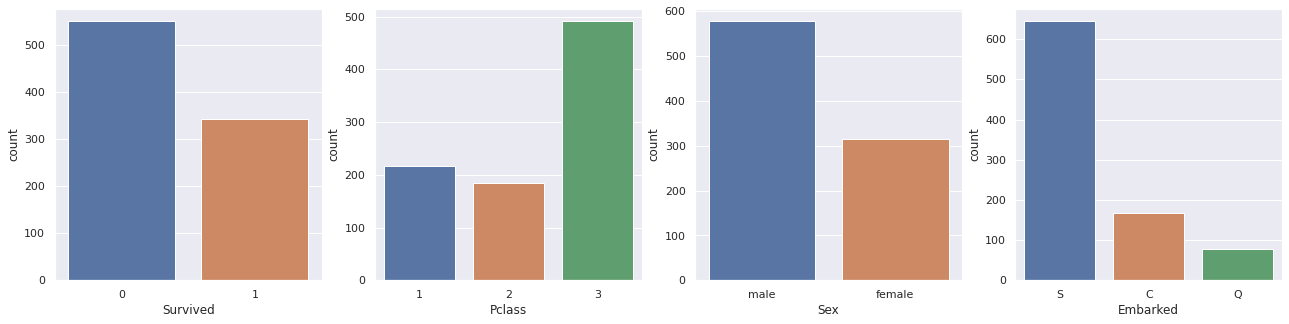

In [8]:
# Gráficos com a distribuição das colunas Sirvived, Pclass, Sex e Embarked
sns.set_theme(style='darkgrid')
f, axs = plt.subplots(1 , 4, figsize=(22,5))
sns.countplot(data=titanic, x="Survived", ax=axs[0])
sns.countplot(data=titanic, x="Pclass", ax=axs[1])
sns.countplot(data=titanic, x="Sex", ax=axs[2])
sns.countplot(data=titanic, x="Embarked", ax=axs[3])

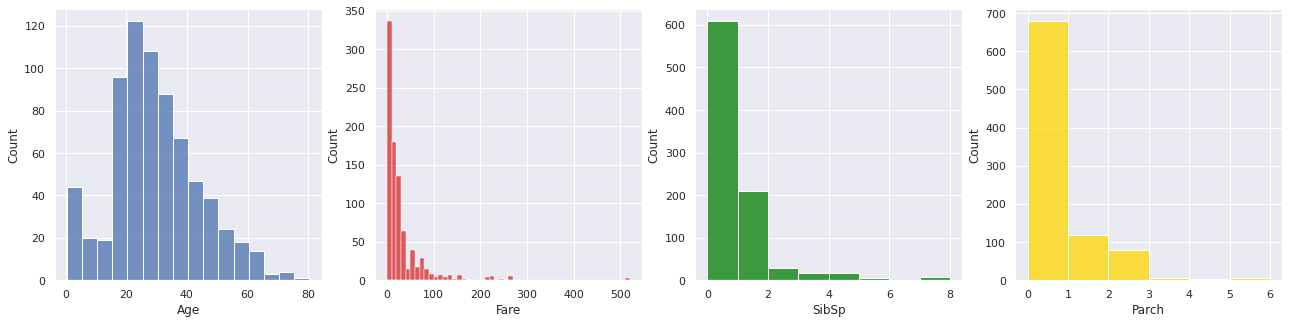

In [9]:
# Histogramas das colunas Age, Fare, SibSp e Parch
f, axs = plt.subplots(1 , 4, figsize=(22,5))
sns.histplot(data=titanic, x = "Age", ax=axs[0], binwidth=5)
sns.histplot(data=titanic, x = "Fare", ax=axs[1], binwidth=10, color='tab:red')
sns.histplot(data=titanic, x = "SibSp", ax=axs[2], binwidth=1, color='green')
sns.histplot(data=titanic, x = "Parch", ax=axs[3], binwidth=1, color='gold')

**Chance de sobrevivência de cada grupo**

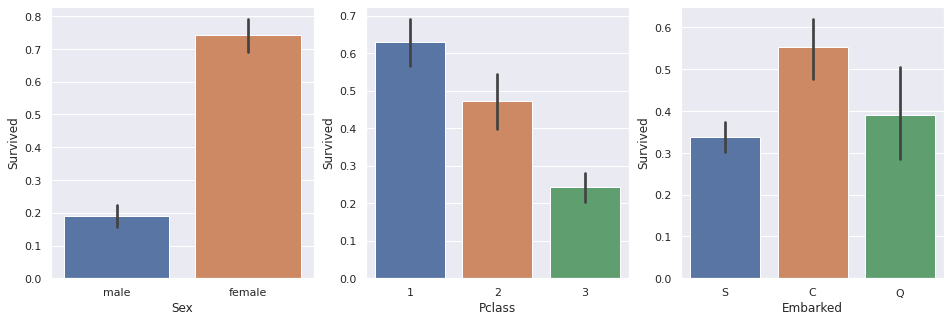

In [10]:
# Vendo a distribuição da coluna Survived por Pclass, Sex e Embarked
f, axs = plt.subplots(1 , 3, figsize=(16,5))
sns.barplot(data=titanic, x= "Sex", y="Survived", ax=axs[0])
sns.barplot(data=titanic, x= "Pclass", y="Survived", ax=axs[1])
sns.barplot(data=titanic, x="Embarked", y="Survived",  ax=axs[2])

Observando os gráficos acima podemos concluir que:
 - Entre todas as mulheres presentes no návio, mais de 70% sobreviveram;
 - Entre os passageiros que estavam na 1ª classe, mais de 60% sobreviveram;
 - Entre os que embarcaram no Porto de Cherbourg, mais de 50% sobreviveram.



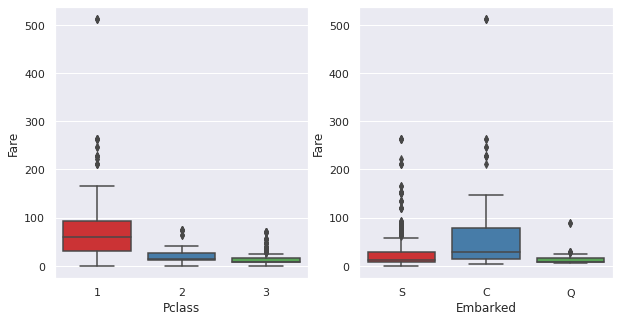

In [11]:
#Influencia do preço da passagem com a classe e com o porto de embarque
f, axs = plt.subplots(1 , 2, figsize=(10,5))
sns.boxplot(data=titanic, x="Pclass", y="Fare", palette="Set1", ax=axs[0])
sns.boxplot(data=titanic, x="Embarked", y="Fare", palette="Set1",ax=axs[1])

A partir do gráfico acima, podemos ver que a mediana do preço da passagem de quem embarcou em Cherbourg é maior.

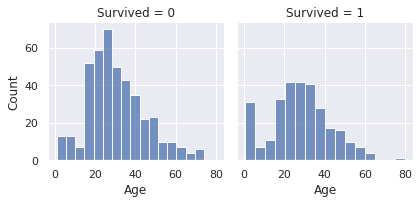

In [12]:
#Influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(titanic, col='Survived')
age_survived.map(sns.histplot, 'Age')

Ao analisar também a distribuição das idades dos sobreviventes e mortos, dá para ver um pico no lado dos sobreviventes para crianças pequenas. O que  confirma a hipótese que, além das mulheres, as crianças também tem maior chance de sobreviverem.

# Parte 3 - Preparação dos Dados

**Visualizando os dados**

In [13]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Selecionando as features**

Como qualquer conjunto de dados do mundo real, você vai se deparar sempre com dados que não servem para nada e outros que não tem peso ou significância nenhuma no seu modelo.

Primeiramente, vamos analisar a coluna ['Name'].
Podemos vemos que nela, o nome de cada passageiro é precedido por um título. Já que o nome será uma coluna que iremos excluir do modelo, podemos separar a parte do título, pois ela pode dar informações relevantes.



In [14]:
# Criando a coluna Title
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

Abaixo do título "Master", tem vários outros títulos com poucas observações. Iremos agrupar esses títulos em um só, chamado "Other".

In [15]:
titanic['Title'] = titanic['Title'].replace(['Dr', 'Rev', 'Col','Mlle', 'Major', 'Jonkheer', 'Countess', 'Mme', 'Ms', 'Sir', 'Lady', 'Capt', 'Don'], 'Other')
titanic['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

Agora iremos analisar a coluna ['Ticket'].

In [16]:
titanic['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

A coluna ['Ticket'] possui muitos valores distintos, portanto iremos retirá-la do dataframe. Junto com ela, vamos desconsiderar também as variáveis ['PassengerId', 'Ticket', 'Cabin'], pois aparentemente não parecem relevantes, e a variável ['Name'], que foi substituida pela ['Title'].

Além delas, vamos excluir também as váriaveis ['Fare'] pois parece ter relação direta com a ['PClass'], que iremos manter.

In [17]:
titanic.drop(['PassengerId', 'Ticket', 'Cabin', 'Fare', 'Name'], axis=1, inplace=True)

In [18]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,male,22.0,1,0,S,Mr
1,1,1,female,38.0,1,0,C,Mrs
2,1,3,female,26.0,0,0,S,Miss
3,1,1,female,35.0,1,0,S,Mrs
4,0,3,male,35.0,0,0,S,Mr


Assim, ficamos com as seguintes variáveis a serem tratadas e preparadas: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Title'].

**Tratando os valores faltantes**

Normalmente, há duas abordagens mais utilizadas quando se encontra missing values no dataset:

- Preencher esses valores arbitrariamente (média, mediana, valor mais frequente); ou 
- Excluir a linha inteira.

In [19]:
#verificando a quantidade de valores faltante
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
Title         0
dtype: int64

A partir dos dados acima, podemos perceber que apenas as colunas ['Embarked','Age'] apresentam dados faltantes.

Considerando a coluna da Idade, podemos substituir os missing values pela média ou mediana. Com o intuito de deixar a análise mais precisa, podemos calcular a mediana da coluna ['Age'] agrupada pela coluna ['Pclass']. Como as passagens da 1ª classe são mais caras, é possível supor que a mediana de idades dessa classe é maior que as outras. Vamos investigar essa hipótese explorando os dados.

In [20]:
# Calcular a mediana das idades dos passageiros agrupadas por classe
titanic.groupby("Pclass")["Age"].agg(np.median)

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

Observamos que a mediana da idade realmente é diferente para cada classe de passageiro. Agora vamos criar uma função para poder substituir os missing values pela mediana, de acordo com a classe do passageiro.

In [21]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 39
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [22]:
#Aplicando a função
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

Pela pequena quantidade de missing values na coluna ['Embarked'] (2 de 889),iremos retirá-los do dataframe.

In [23]:
# Retirar as instâncias com "Embarked" = NaN
titanic.dropna(subset = ['Embarked'], inplace = True)

In [24]:
# Checar se ainda existem missing values no dataset
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
Title       0
dtype: int64

**Preparando as variáveis para o modelo**

Para trabalhar com o modelo matemático, precisamos transformar os dados de entrada que estão em formato categoria para números, como no caso das variáveis ['Sex','Embarked','Title']. 

- Como pode-se ver abaixo, os valores possíveis de Sex foram convertidos para {'male': 0, 'female': 1}. 
- Já em relação às variáveis ['Embarked', 'Title'], foi aplicado o conceito de variáveis dummies.

As variáveis dummies (dummy variables) assumem aqui apenas valores 0 e 1, criando uma nova coluna para cada valor possível da variável categórica. 


In [25]:
# converter 'Sex' em 0 e 1
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

# dummie variables para 'Embaked' e 'Title'
titanic = pd.get_dummies(data=titanic, columns = ['Embarked','Title'])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,0,22.0,1,0,0,0,1,0,0,1,0,0
1,1,1,1,38.0,1,0,1,0,0,0,0,0,1,0
2,1,3,1,26.0,0,0,0,0,1,0,1,0,0,0
3,1,1,1,35.0,1,0,0,0,1,0,0,0,1,0
4,0,3,0,35.0,0,0,0,0,1,0,0,1,0,0


Por fim, iremos separar a coluna ['Survived'] do dataset, já que ela será a variável alvo.

In [26]:
target = titanic.Survived.copy()
titanic.drop(['Survived'], axis=1, inplace=True)

# Parte 4 - Construção do Modelo e Avaliação

**Divisão dos dados em teste e treino**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(titanic, target, test_size = 0.2, random_state = 1)

In [28]:
print('Tamanho do conjunto de treinamento:', len(X_train))
print('Tamanho do conjunto de teste:', len(X_test))

Tamanho do conjunto de treinamento: 711
Tamanho do conjunto de teste: 178


**Construção da rede**

In [29]:
#verificando o número de entradas da rede
titanic.shape[1]

13

In [30]:
model = tf.keras.models.Sequential([ 
               tf.keras.layers.Dense(units=10, activation = 'relu', input_dim=13),             
               tf.keras.layers.Dense(units=10, activation = 'relu'),
             
               tf.keras.layers.Dense(units=1, activation = 'sigmoid')])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Treinamento da rede**

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=50, batch_size=5, verbose=2)

Epoch 1/50
114/114 - 2s - loss: 1.0000 - accuracy: 0.5405 - val_loss: 0.6759 - val_accuracy: 0.5874 - 2s/epoch - 19ms/step
Epoch 2/50
114/114 - 1s - loss: 0.6280 - accuracy: 0.6725 - val_loss: 0.6546 - val_accuracy: 0.5944 - 506ms/epoch - 4ms/step
Epoch 3/50
114/114 - 1s - loss: 0.6083 - accuracy: 0.6796 - val_loss: 0.6472 - val_accuracy: 0.6014 - 510ms/epoch - 4ms/step
Epoch 4/50
114/114 - 0s - loss: 0.5884 - accuracy: 0.7025 - val_loss: 0.6178 - val_accuracy: 0.6014 - 376ms/epoch - 3ms/step
Epoch 5/50
114/114 - 0s - loss: 0.5683 - accuracy: 0.7342 - val_loss: 0.5692 - val_accuracy: 0.7203 - 391ms/epoch - 3ms/step
Epoch 6/50
114/114 - 0s - loss: 0.5500 - accuracy: 0.7500 - val_loss: 0.5565 - val_accuracy: 0.7133 - 373ms/epoch - 3ms/step
Epoch 7/50
114/114 - 0s - loss: 0.5324 - accuracy: 0.7465 - val_loss: 0.5548 - val_accuracy: 0.7063 - 446ms/epoch - 4ms/step
Epoch 8/50
114/114 - 0s - loss: 0.5216 - accuracy: 0.7799 - val_loss: 0.5223 - val_accuracy: 0.7552 - 456ms/epoch - 4ms/step
Ep

**Avaliação do modelo**

In [33]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [34]:
precisao = accuracy_score(Y_test, y_pred)
print("Acurácia do modelo:", np.round(precisao*100,2),'%')

Acurácia do modelo: 83.71 %


**Matriz de confusão**

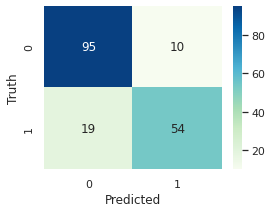

In [39]:
cm = confusion_matrix(Y_test, y_pred)
#print(cm)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot=True, fmt='d',cmap='GnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

**Gráfico da acurácia**

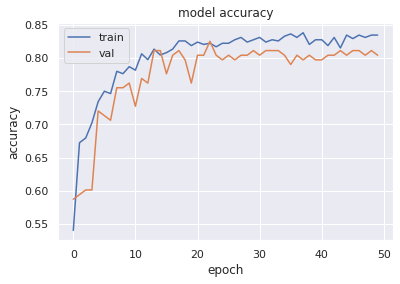

In [36]:
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left') 

**Gráfico da perda**

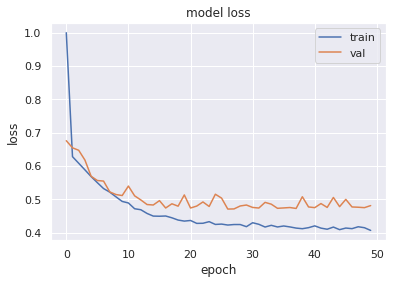

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [38]:
# Mostra o Classification Report
print(classification_report(Y_test, y_pred))

# precision é a acurácia das predições positivas
# precision = [True Positive/(True Positive + False Positive)]

# recall é a fração de predições positivas que foram corretamente identificadas.
# precision = [True Positive/(True Positive + False Negative)]

# f1-score é uma métrica de acurácia do modelo, que combina as métricas precision e recall calculando a média harmônica entre elas.
# F1 = 2 * (precision * recall) / (precision + recall)

# Support é a ocorrência de cada classe de resultado 

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       105
           1       0.84      0.74      0.79        73

    accuracy                           0.84       178
   macro avg       0.84      0.82      0.83       178
weighted avg       0.84      0.84      0.84       178

